In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
import pandas as pd
import os
%matplotlib inline

In [2]:
data = pd.read_csv("/home/techfield/class/Homework8_logistic/xor.csv") 
data[:10]

,x1,x2,y
0,1.907567,0.325865,0
1,2.270544,2.258817,0
2,2.323086,1.466601,0
3,0.752419,2.684305,0
4,2.837229,2.238149,0
5,1.758979,3.873314,0
6,-0.153115,2.294020,0
7,3.385935,1.058756,0
8,1.981424,3.041335,0
9,1.242928,-0.075891,0


In [3]:
y = data.iloc[:,2]

In [4]:
#X = np.column_stack((np.ones((4000,1)), data))
X_1 = data['x1']
X_2 = data['x2']
X_3 = X_1 * X_2

In [5]:
data1 = np.column_stack((np.ones((4000,1)), X_1,X_2,X_3))

In [6]:
X = data1


In [7]:
def sigmoid(h):
    return 1/(1 + np.exp(-h))

def cross_entropy(y, p_hat):
    return -np.sum(y*np.log(p_hat) + (1 - y)*np.log(1 - p_hat))

def accuracy(y, p_hat):
    return np.mean(y == np.round(p_hat))

/home/techfield/.local/lib/python3.5/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


0       2.943201e-01
1       1.309059e-04
2       2.903739e-03
3       2.746461e-02
4       1.572090e-05
5       5.831096e-06
6       6.417119e-01
7       2.384617e-03
8       2.498092e-05
9       5.868683e-01
10      5.060101e-03
11      6.668837e-01
12      6.099935e-06
13      2.524757e-04
14      2.795585e-03
15      1.309012e-01
16      3.591169e-04
17      1.008015e-02
18      2.379095e-08
19      3.756457e-01
20      3.359372e-02
21      2.494241e-02
22      1.503389e-03
23      1.736415e-04
24      1.044245e-01
25      1.223299e-01
26      1.060056e-03
27      7.259178e-04
28      2.049293e-01
29      2.516939e-05
            ...     
3970   -7.684634e-05
3971   -5.079229e-04
3972   -1.271656e-03
3973   -1.653983e-03
3974   -1.718825e-04
3975   -8.544384e-06
3976   -1.194217e-01
3977   -2.114706e-06
3978   -5.467088e-03
3979   -3.563496e-04
3980   -1.969595e-06
3981   -1.731613e-05
3982   -1.642013e-03
3983   -9.284563e-03
3984   -4.803833e-02
3985   -8.270654e-07
3986   -4.019

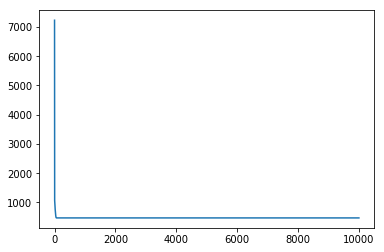

In [22]:
w = np.random.randn(4)

eta = 1e-3
epochs = int(1e4)
J = [0]*epochs

for epoch in range(epochs):
    p_hat = sigmoid(X.dot(w))
    J[epoch] = cross_entropy(y, p_hat)
    w -= eta*X.T.dot(p_hat - y)
    
plt.figure()
plt.plot(J)

p_hat-y

In [23]:
w

array([ 0.05859475,  0.0977878 , -0.03772141, -1.78139628])

In [10]:
p_hat = sigmoid(X.dot(w))

print("Accuracy: {:0.4f}".format(accuracy(y,p_hat)))

Accuracy: 0.9565


(-6, 6)

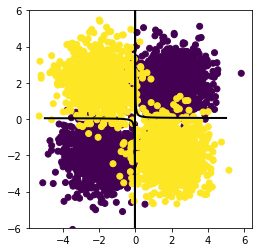

In [11]:
x1 = np.linspace(-5,5,2001)
x2 = (-w[0] - x1*(w[1])) / (w[2] + x1*(w[3]))

fig,ax = plt.subplots()
ax.scatter(X[:,1], X[:,2], c = y)
ax.plot(x1, x2, color = "#000000", linewidth = 2)
ax.set_aspect(1)
ax.set_ylim([-6,6])

Creates linear features and gets an accuracy of .9565 and we see a model that fits fairly well.